# Figures for section 3.3

In [1]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 22})

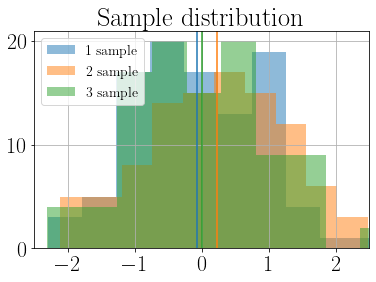

In [2]:
n_trials = 3
size = 100

palette = sns.color_palette()

for i in range(n_trials):
    cur_trial = stats.norm.rvs(size=size)
    plt.hist(cur_trial, bins = 10, alpha=0.5, color=palette[i], label=f"{i + 1} sample")
    plt.axvline(x=np.mean(cur_trial), color=palette[i], alpha=1)

plt.legend(fontsize=14, loc='upper left')
plt.grid(True)
plt.title("Sample distribution")
plt.xlim([-2.5, 2.5])
#plt.savefig("3_3_distributions.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

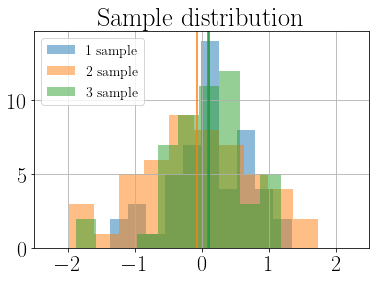

In [3]:
n_hists = 3
n_trials = 50
size = 2

palette = sns.color_palette()

for i in range(n_hists):
    x_mean_list = []
    for j in range(n_trials):
        cur_trial = stats.norm.rvs(size=size)
        x_mean_list.append(np.mean(cur_trial))
    plt.hist(x_mean_list, bins = 10, alpha=0.5, color=palette[i], label=f"{i + 1} sample")
    plt.axvline(x=np.mean(x_mean_list), color=palette[i], alpha=1)

plt.legend(fontsize=14, loc='upper left')
plt.grid(True)
plt.title("Sample distribution")
plt.xlim([-2.5, 2.5])
#plt.savefig("3_3_distributions_means.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

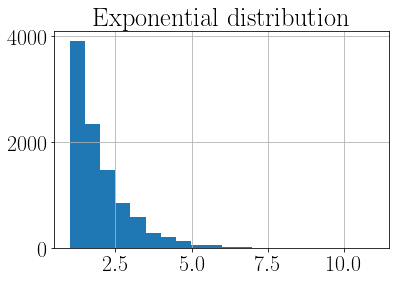

2.0159121251261287
1.022637647895007


In [4]:
n_points = 10000
n_trials = 1000
size = 10

lam = 1

exp_numbers = stats.expon.rvs(lam, size=n_points)
plt.hist(exp_numbers, bins=20)
plt.grid(True)
plt.title("Exponential distribution")
#plt.savefig("3_3_exp_distribution.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()
print(np.mean(exp_numbers))
print(np.std(exp_numbers))

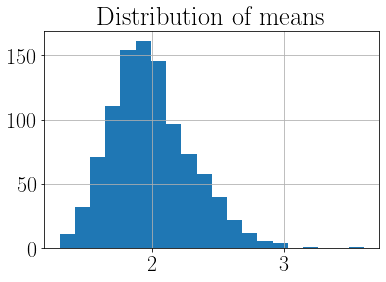

1.9939291300457092
0.31135501556913575


In [16]:
means_list = []
for i in range(n_trials):
    cur_exp_numbers = stats.expon.rvs(lam, size=size)
    means_list.append(np.mean(cur_exp_numbers))
    
plt.hist(means_list, bins=20)
plt.grid(True)
plt.title("Distribution of means")
#plt.savefig("3_3_exp_means_distribution.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()
print(np.mean(means_list))
print(np.std(means_list))

In [6]:
np.sqrt(10) * np.std(means_list)

0.9661447145127483

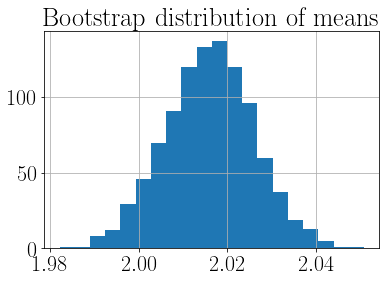

2.0161028407504027
0.010012151952050716


In [13]:
n_bootstrap = 1000

mean_bootstrap_list = []
for i in range(n_bootstrap):
    rand_ind = np.random.randint(0, n_points, size=n_points)
    trial = exp_numbers[rand_ind]
    mean_bootstrap_list.append(np.mean(trial))
    
plt.hist(mean_bootstrap_list, bins=20)
plt.grid(True)
plt.title("Bootstrap distribution of means")
#plt.savefig("3_3_exp_bootstrap_distribution.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()
print(np.mean(mean_bootstrap_list))
print(np.std(mean_bootstrap_list))

In [19]:
q_left = np.quantile(mean_bootstrap_list, 0.025)
q_right = np.quantile(mean_bootstrap_list, 0.975)
print(q_left, q_right)

1.9962025362818527 2.035955893313993


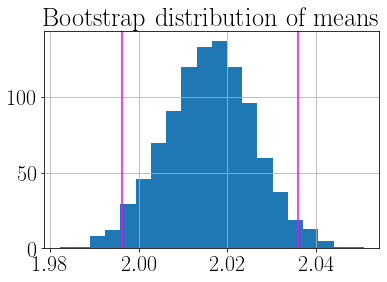

In [21]:
plt.hist(mean_bootstrap_list, bins=20)
plt.axvline(q_left, color="magenta")
plt.axvline(q_right, color="magenta")
plt.grid(True)
plt.title("Bootstrap distribution of means")
#plt.savefig("3_3_exp_bootstrap_distribution_quantiles.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

In [22]:
q_left - np.mean(mean_bootstrap_list)

-0.019900304468549956

In [23]:
np.mean(exp_numbers)

2.0159121251261287

In [25]:
np.std(exp_numbers) / 100

0.01022637647895007

# Распределение стьюдента

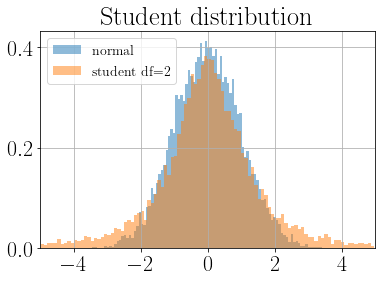

In [85]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 22})

BINS_COUNT = 100
size = 10000
df1 = 0.1
df2 = 2

normal_distr = stats.norm.rvs(size = size)
normal_distr = normal_distr[(normal_distr > -5) & (normal_distr < 5)]

student_distr_1 = stats.t.rvs(df=df1, size=size)
student_distr_1 = student_distr_1[(student_distr_1 > -5) & (student_distr_1 < 5)]

student_distr_2 = stats.t.rvs(df=df2, size=size)
student_distr_2 = student_distr_2[(student_distr_2 > -5) & (student_distr_2 < 5)]

plt.hist(normal_distr, alpha=0.5, density=True, label="normal", bins=BINS_COUNT)
#plt.hist(student_distr_1, alpha=0.5, density=True, label=f"student df={df1}", bins=BINS_COUNT)
plt.hist(student_distr_2, alpha=0.5, density=True, label=f"student df={df2}", bins=BINS_COUNT)
plt.legend(fontsize=14, loc='upper left')
plt.grid(True)
plt.title("Student distribution")
plt.xlim([-5, 5])
#plt.savefig("3_3_distributions_student.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()


In [64]:
normal_distr[(normal_distr > 3) & (normal_distr > 2)]

array([3.43597239, 3.38596701, 3.23285547, 3.36983743, 3.13240979,
       3.82969119, 3.03532412, 3.04480889, 3.08485873, 3.11796596,
       3.3659447 , 3.0435336 ])

In [56]:
normal_distr > 2

array([False, False, False, ..., False, False, False])

In [57]:
normal_distr > 3

array([False, False, False, ..., False, False, False])

In [62]:
np.array([True, False]) & np.array([True, True])

array([ True, False])

# q-q plot

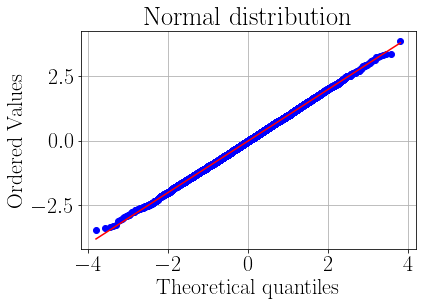

In [106]:
import scipy.stats as stats
import matplotlib.pyplot as plt

size=1000

fig, ax = plt.subplots()
#norm_sample = stats.norm.rvs(size=size)
stats.probplot(normal_distr, plot=ax)
plt.title("Normal distribution")
plt.grid(True)
#plt.savefig("3_3_qq_normal.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

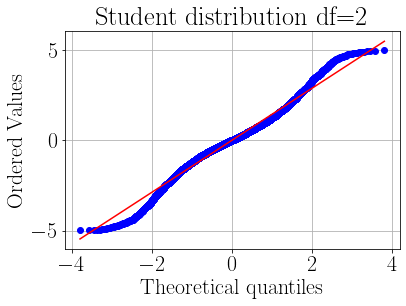

In [107]:
fig, ax = plt.subplots()
#norm_sample = stats.norm.rvs(size=size)
stats.probplot(student_distr_2, plot=ax)
plt.title("Student distribution df=2")
plt.grid(True)
#plt.savefig("3_3_qq_student.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

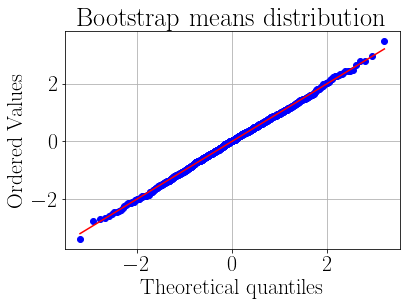

In [108]:
fig, ax = plt.subplots()
#norm_sample = stats.norm.rvs(size=size)
mean_bootstrap_list = np.array(mean_bootstrap_list)
stats.probplot((mean_bootstrap_list - np.mean(mean_bootstrap_list)) / np.std(mean_bootstrap_list) , plot=ax)
plt.title("Bootstrap means distribution")
plt.grid(True)
#plt.savefig("3_3_qq_bootstrap.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

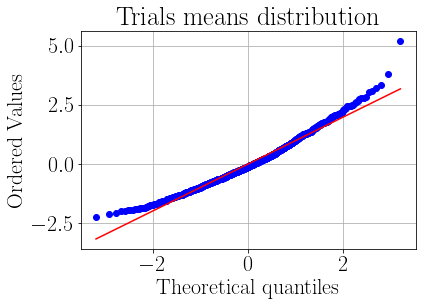

In [109]:
fig, ax = plt.subplots()
#norm_sample = stats.norm.rvs(size=size)
means_list = np.array(means_list)
stats.probplot((means_list - np.mean(means_list)) / np.std(means_list), plot=ax)
plt.title("Trials means distribution ")
plt.grid(True)
#plt.savefig("3_3_qq_trials.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()